## <font color = 'purple'>Notebook 9: K-Means Clustering</font>

<font color = 'purple'>K-means clustering is an unsupervised machine learning algorithm used to partition data into k distinct clusters based on feature similarity. It assigns each data point to the cluster with the nearest mean, iteratively refining clusters until optimal centroids are achieved.</font>








In [ ]:
from google.colab import files
uploaded = files.upload()

Saving main_dataset.xlsx to main_dataset.xlsx


In [ ]:
# Libraries for data processing
import numpy as np
import pandas as pd

# Libraries for text processing and NLP
import nltk
from textblob import TextBlob

# Gensim library for topic modelling and text vectorisation
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

# Libraries for data visualisation
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt

# Miscellaneous imports
import re
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('main_dataset.xlsx')

print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns)

df.head()

Shape of the dataset: (44855, 4)
Columns in the dataset: Index(['date', 'review', 'rating', 'userName'], dtype='object')


,date,review,rating,userName
0,2021-05-06 05:15:00.000,This feature has been one of the most annoying...,5,Keanu De Sousa
1,2024-02-01 09:06:59.904,"The privacy on WhatsApp is incredible, I know ...",4,The great idea!!!
2,2023-08-14 05:42:00.000,"Hi WhatsApp,\nThis app is really great, I use ...",4,Pokey Ball ‚öæÔ∏è
3,2024-08-04 15:53:00.384,If there was ever an equivalent of social serv...,1,Zenicero
4,2024-05-26 01:12:59.616,Im on holiday and reliant on whatsapp to commu...,1,JohnDoe63737286


In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if you haven't already
nltk.download('stopwords')

# Set of stopwords in English
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if pd.isna(text) or not isinstance(text, str):
        return ""

    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Split text into words and remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]

    # Join the filtered words back into a single string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

df['content_cleaned'] = df['review'].apply(preprocess_text)

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,date,review,rating,userName,content_cleaned
0,2021-05-06 05:15:00.000,This feature has been one of the most annoying...,5,Keanu De Sousa,feature one annoying aspects whatsapp everytim...
1,2024-02-01 09:06:59.904,"The privacy on WhatsApp is incredible, I know ...",4,The great idea!!!,privacy whatsapp incredible know probably donä...
2,2023-08-14 05:42:00.000,"Hi WhatsApp,\nThis app is really great, I use ...",4,Pokey Ball ‚öæÔ∏è,hi whatsapp app really great use everyday exac...
3,2024-08-04 15:53:00.384,If there was ever an equivalent of social serv...,1,Zenicero,ever equivalent social services took words awa...
4,2024-05-26 01:12:59.616,Im on holiday and reliant on whatsapp to commu...,1,JohnDoe63737286,im holiday reliant whatsapp communicate agents...


In [ ]:
df.isnull()
total_null_values = df.isnull().sum().sum()
print("Total null values in the DataFrame: ", total_null_values)

Total null values in the DataFrame:  12


In [ ]:
df.fillna('', inplace = True)

In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True)

In [ ]:
df = df[['content_cleaned', 'review', 'rating', 'date']]
df.head()

,content_cleaned,review,rating,date
0,feature one annoying aspects whatsapp everytim...,This feature has been one of the most annoying...,5,2021-05-06 05:15:00.000
1,privacy whatsapp incredible know probably donä...,"The privacy on WhatsApp is incredible, I know ...",4,2024-02-01 09:06:59.904
2,hi whatsapp app really great use everyday exac...,"Hi WhatsApp,\nThis app is really great, I use ...",4,2023-08-14 05:42:00.000
3,ever equivalent social services took words awa...,If there was ever an equivalent of social serv...,1,2024-08-04 15:53:00.384
4,im holiday reliant whatsapp communicate agents...,Im on holiday and reliant on whatsapp to commu...,1,2024-05-26 01:12:59.616


In [ ]:
def get_sentiment(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df['sentiment'] = df['content_cleaned'].apply(get_sentiment)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else
                                              ('negative' if x <- 0.1 else 'neutral'))

In [ ]:
df

,content_cleaned,review,rating,date,sentiment,sentiment_label
0,feature one annoying aspects whatsapp everytim...,This feature has been one of the most annoying...,5,2021-05-06 05:15:00.000,-0.483333,negative
1,privacy whatsapp incredible know probably donä...,"The privacy on WhatsApp is incredible, I know ...",4,2024-02-01 09:06:59.904,0.371429,positive
2,hi whatsapp app really great use everyday exac...,"Hi WhatsApp,\nThis app is really great, I use ...",4,2023-08-14 05:42:00.000,0.350000,positive
3,ever equivalent social services took words awa...,If there was ever an equivalent of social serv...,1,2024-08-04 15:53:00.384,0.294444,positive
4,im holiday reliant whatsapp communicate agents...,Im on holiday and reliant on whatsapp to commu...,1,2024-05-26 01:12:59.616,-0.166667,negative
...,...,...,...,...,...,...
44850,free delivery prime,free delivery with prime,5,2024-08-14 00:45:59.616,0.400000,positive
44851,would expectamazon trying get hand pocket,Just what you would expect--Amazon trying to g...,3,2024-08-14 00:20:00.096,0.000000,neutral
44852,registry system mess sorting price low high wa...,The registry system is a mess. When sorting by...,2,2024-08-14 00:18:59.616,0.058231,neutral
44853,clothes furniture options kinda meh overall de...,The clothes and furniture options are kinda me...,3,2024-08-14 00:18:00.000,-0.025000,neutral


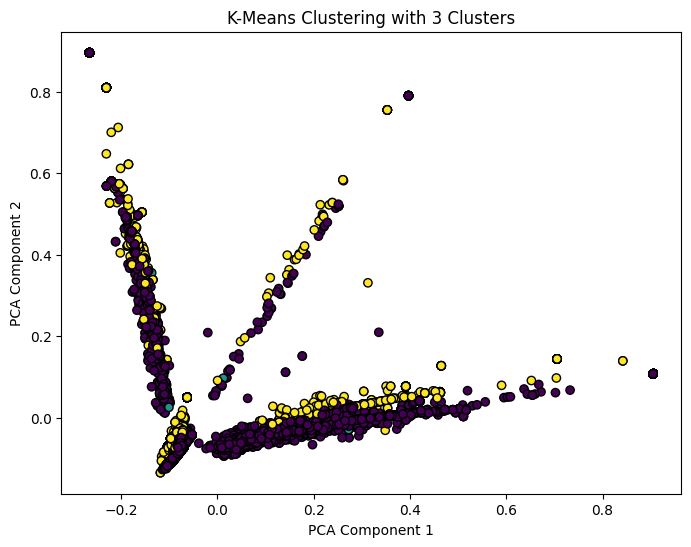

,content_cleaned,rating,sentiment_label,cluster_label
0,feature one annoying aspects whatsapp everytim...,5,negative,Cluster 1
1,privacy whatsapp incredible know probably donä...,4,positive,Cluster 1
2,hi whatsapp app really great use everyday exac...,4,positive,Cluster 1
3,ever equivalent social services took words awa...,1,positive,Cluster 1
4,im holiday reliant whatsapp communicate agents...,1,negative,Cluster 1


cluster
0    40462
2     4203
1      190
Name: count, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

X_tfidf = tfidf_vectorizer.fit_transform(df['content_cleaned'])

k = 3

kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(X_tfidf)

df['cluster'] = kmeans.predict(X_tfidf)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title(f'K-Means Clustering with {k} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

print(df['cluster'].value_counts())

df['cluster_label'] = df['cluster'].map({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'})
df[['content_cleaned', 'rating', 'sentiment_label', 'cluster_label']].head()

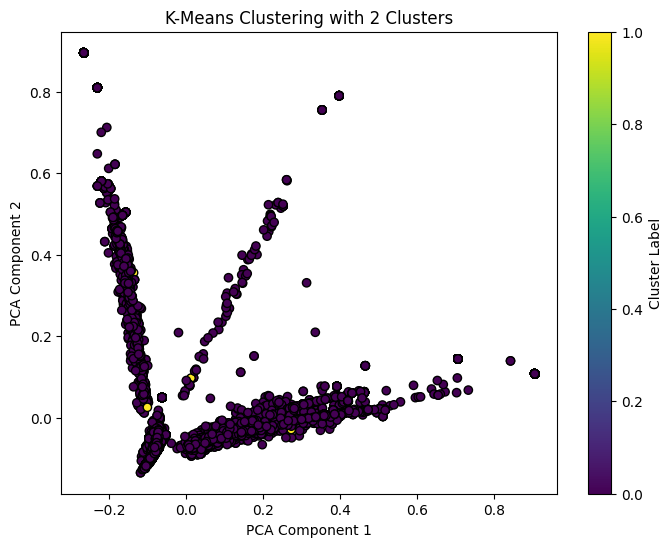

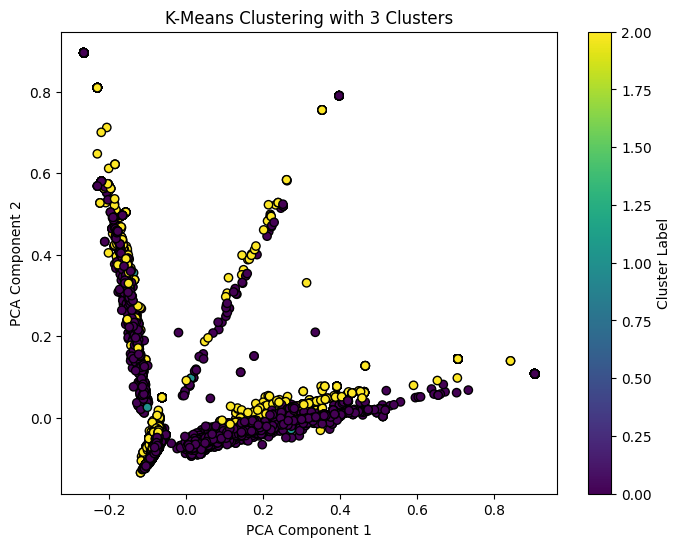

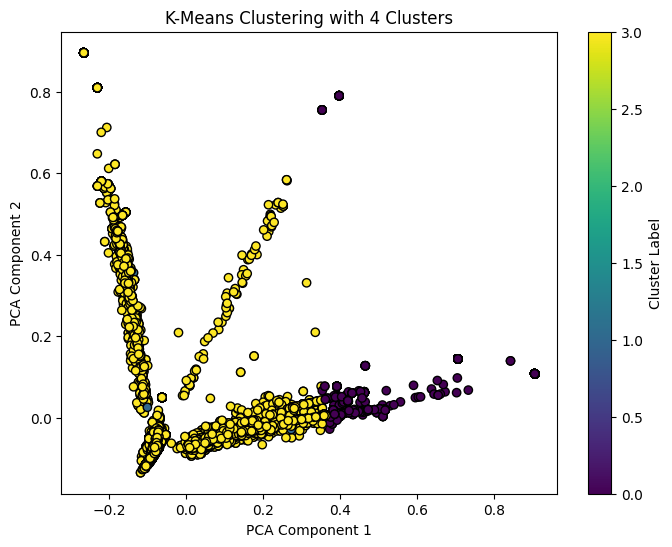

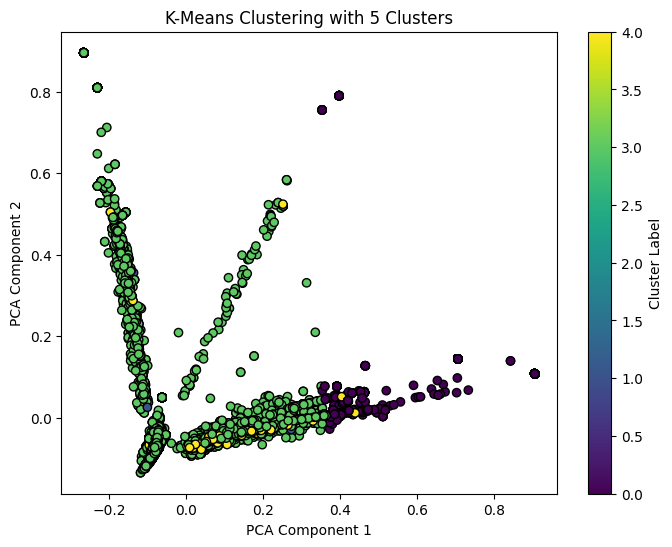

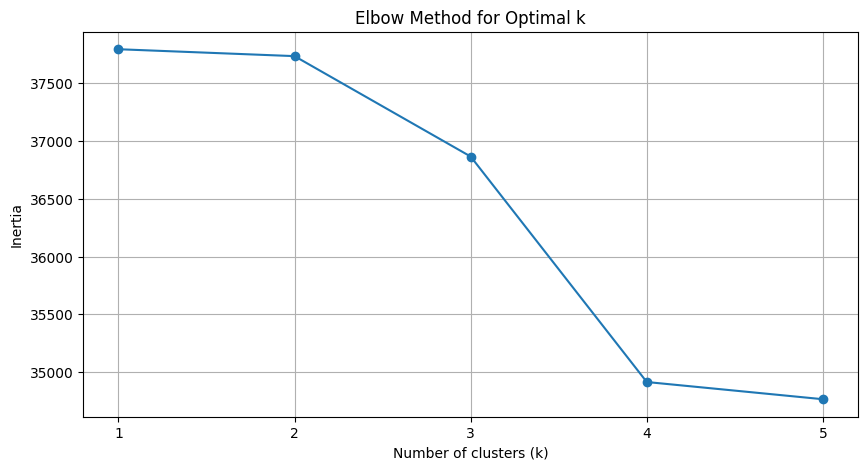

cluster
3    39625
0     3963
4     1110
1      155
2        2
Name: count, dtype: int64
                                     content_cleaned  cluster cluster_label
0  feature one annoying aspects whatsapp everytim...        4     Cluster 5
1  privacy whatsapp incredible know probably donä...        4     Cluster 5
2  hi whatsapp app really great use everyday exac...        4     Cluster 5
3  ever equivalent social services took words awa...        4     Cluster 5
4  im holiday reliant whatsapp communicate agents...        4     Cluster 5


In [ ]:
# Function to test various k values for KMeans
def test_kmeans_k_values(df, max_k=6):

    tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    X_tfidf = tfidf_vectorizer.fit_transform(df['content_cleaned'])

    inertia_values = []

    for k in range(1, max_k + 1):

        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_tfidf)

        inertia_values.append(kmeans.inertia_)

        df['cluster'] = kmeans.predict(X_tfidf)

        if k > 1:
            pca = PCA(n_components=2)
            X_pca = pca.fit_transform(X_tfidf.toarray())

            plt.figure(figsize=(8, 6))
            plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', marker='o', edgecolor='k')
            plt.title(f'K-Means Clustering with {k} Clusters')
            plt.xlabel('PCA Component 1')
            plt.ylabel('PCA Component 2')
            plt.colorbar(label='Cluster Label')
            plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_k + 1), inertia_values, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(range(1, max_k + 1))
    plt.grid()
    plt.show()

    # Analyze cluster distribution
    print(df['cluster'].value_counts())

    # Optional: Assigning cluster labels based on majority sentiment in each cluster
    # Modify this mapping based on your own criteria
    if max_k > 1:
        df['cluster_label'] = df['cluster'].map({i: f'Cluster {i+1}' for i in range(max_k)})
        print(df[['content_cleaned', 'cluster', 'cluster_label']].head())

# Run the function to test KMeans with various k values
test_kmeans_k_values(df, max_k=5)

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

k=2 | Silhouette Score: 0.060 | Calinski-Harabasz Score: 70.955 | Davies-Bouldin Score: 3.015
k=3 | Silhouette Score: 0.056 | Calinski-Harabasz Score: 564.377 | Davies-Bouldin Score: 3.358
k=4 | Silhouette Score: 0.102 | Calinski-Harabasz Score: 1231.856 | Davies-Bouldin Score: 1.870
k=5 | Silhouette Score: 0.103 | Calinski-Harabasz Score: 975.788 | Davies-Bouldin Score: 2.888


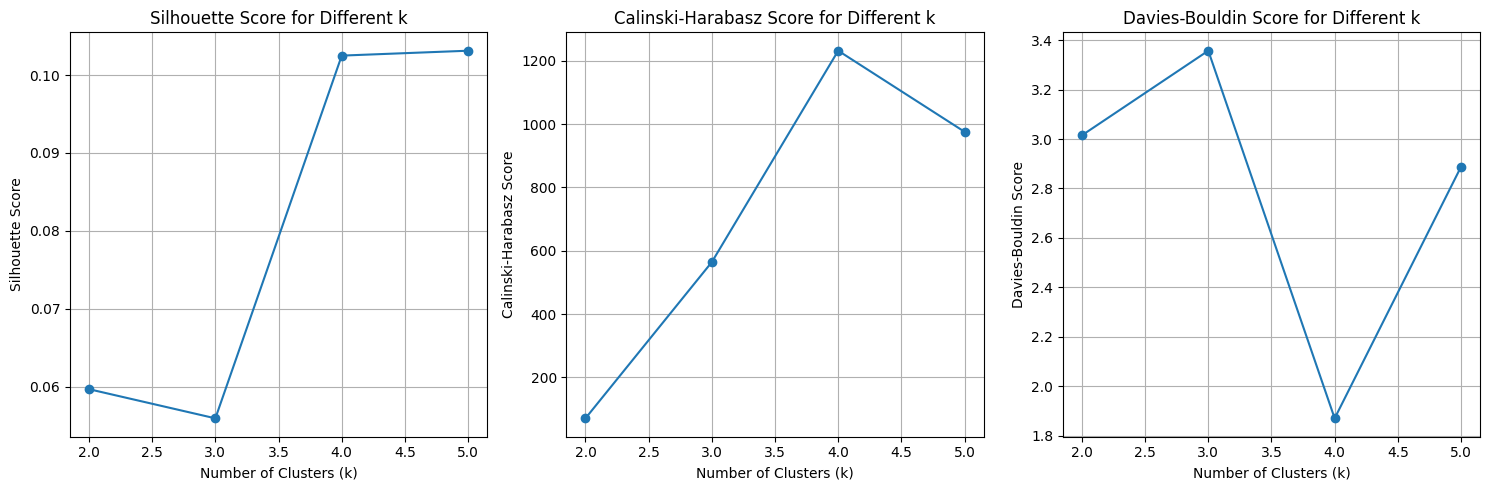

In [ ]:
def evaluate_kmeans_k_values(df, max_k=6):

    tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    X_tfidf = tfidf_vectorizer.fit_transform(df['content_cleaned'])

    silhouette_scores = []
    calinski_harabasz_scores = []
    davies_bouldin_scores = []

    for k in range(2, max_k + 1):

        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_tfidf)

        silhouette_avg = silhouette_score(X_tfidf, labels)
        silhouette_scores.append(silhouette_avg)

        ch_score = calinski_harabasz_score(X_tfidf.toarray(), labels)
        calinski_harabasz_scores.append(ch_score)

        db_score = davies_bouldin_score(X_tfidf.toarray(), labels)
        davies_bouldin_scores.append(db_score)

        print(f"k={k} | Silhouette Score: {silhouette_avg:.3f} | Calinski-Harabasz Score: {ch_score:.3f} | Davies-Bouldin Score: {db_score:.3f}")

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Score for Different k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)

    plt.subplot(1, 3, 2)
    plt.plot(range(2, max_k + 1), calinski_harabasz_scores, marker='o')
    plt.title('Calinski-Harabasz Score for Different k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Calinski-Harabasz Score')
    plt.grid(True)

    plt.subplot(1, 3, 3)
    plt.plot(range(2, max_k + 1), davies_bouldin_scores, marker='o')
    plt.title('Davies-Bouldin Score for Different k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Davies-Bouldin Score')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

evaluate_kmeans_k_values(df, max_k=5)